<a href="https://colab.research.google.com/github/last-war/HW_DataScience/blob/Homework-07/HW7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Візьміть датасет movielens і побудуйте модель матричної факторизації. У даній бібліотеці він має назву SVD. Підберіть найкращі параметри за допомогою крос-валідації, також поекспериментуйте з іншими алгоритмами розрахунків (SVD++, NMF) і оберіть той, який буде оптимальним.

Підказки як саме побудувати дану модель ви знайдете в документації до даної бібліотеки.

імпорт
+ приклад з документації

In [1]:
!pip install scikit-surprise
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate

# Load the movielens-100k dataset (download it if needed).
data = Dataset.load_builtin('ml-100k')

# Use the famous SVD algorithm.
algo = SVD()

# Run 5-fold cross-validation and print results.
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 19.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3097768 sha256=49084f2dd980183be7d695fdbd40b2d81b7706b16ec350eb7534a1c1ea48454c
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise
Dataset ml-100k could not be found. Do you want to download it? [Y/n] Y
Trying to download dataset from https://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9303  0.9306  0.9384  0.9406  0.9396  0.9359  0.0045  
MAE (testset)     0.7328  0.7348  0.7399  0.7415  0.7394  0.7377  0.0033  
Fit time          1.46    1.45    1.44  

{'test_rmse': array([0.9302933 , 0.93064752, 0.93837967, 0.94061354, 0.93962002]),
 'test_mae': array([0.73280553, 0.73484354, 0.73989749, 0.74149186, 0.73937086]),
 'fit_time': (1.4590895175933838,
  1.4522128105163574,
  1.4416062831878662,
  1.3347647190093994,
  2.151381492614746),
 'test_time': (0.14823079109191895,
  0.2535665035247803,
  0.15741276741027832,
  0.22367024421691895,
  0.2679293155670166)}

init libs

In [2]:
!pip install scikit-surprise
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate, train_test_split, KFold
from surprise import accuracy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 44.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3097764 sha256=6bbcef253df48368919e628df57da8746ca4a1e388a25c6d8cf4fa00e8ae70d8
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


завантаження датасету

In [3]:
data = Dataset.load_builtin('ml-100k')

Dataset ml-100k could not be found. Do you want to download it? [Y/n] Y
Trying to download dataset from https://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k


підготовка тестових даних

пошук кількості факторів

пошук кількості ітераторів


cur_fact 10 epoch 10
cur_fact 10 epoch 20
cur_fact 10 epoch 50
cur_fact 10 epoch 100
cur_fact 10 epoch 150
cur_fact 25 epoch 10
cur_fact 25 epoch 20
cur_fact 25 epoch 50
cur_fact 25 epoch 100
cur_fact 25 epoch 150
cur_fact 50 epoch 10
cur_fact 50 epoch 20
cur_fact 50 epoch 50
cur_fact 50 epoch 100
cur_fact 50 epoch 150
cur_fact 100 epoch 10
cur_fact 100 epoch 20
cur_fact 100 epoch 50
cur_fact 100 epoch 100
cur_fact 100 epoch 150
cur_fact 150 epoch 10
cur_fact 150 epoch 20
cur_fact 150 epoch 50
cur_fact 150 epoch 100
cur_fact 150 epoch 150
cur_fact 200 epoch 10
cur_fact 200 epoch 20
cur_fact 200 epoch 50
cur_fact 200 epoch 100
cur_fact 200 epoch 150


,10,20,50,100,150
10,0.945064,0.936154,0.942415,0.966423,0.979862
25,0.945199,0.935716,0.961699,1.005444,1.032326
50,0.945776,0.934433,0.966683,1.015943,1.029324
100,0.947811,0.936793,0.964082,0.976212,0.976697
150,0.949228,0.940201,0.957686,0.959321,0.955765
200,0.950640,0.941518,0.953363,0.948497,0.945773


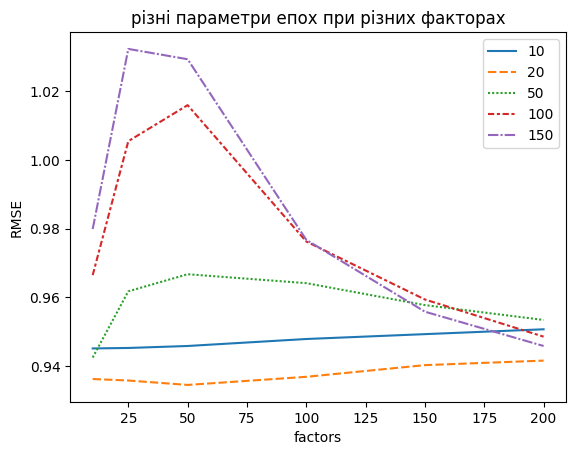

In [43]:
import pandas as pd
import seaborn as sn

trainset, testset = train_test_split(data, test_size=0.25)

kf = KFold(n_splits=5)

factors = [10, 25, 50, 100, 150, 200] #100
epochs = [10, 20, 50, 100, 150] #20
df_rmse = pd.DataFrame()

for cur_fact in factors:
  for epoch in epochs:
    print(f'cur_fact {cur_fact} epoch {epoch}')
    algo = SVD(n_factors=cur_fact, n_epochs=epoch)
    algo.fit(trainset)
    predictions = algo.test(testset)
    rez = cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=False)['test_rmse']
    df_rmse.loc[cur_fact,epoch] = rez.mean()

#another algo

#    for trainset, testset in kf.split(data):
#      algo = SVD(n_factors=cur_fact, n_epochs=epoch)
#      # train and test algorithm.
#      algo.fit(trainset)
#      predictions = algo.test(testset)
#
#      # Compute and print Root Mean Squared Error
#      df_rmse.loc[cur_fact,epoch] = accuracy.rmse(predictions, verbose=True)
sn.lineplot(data=df_rmse).set(xlabel='factors', ylabel='RMSE', title='різні параметри епох при різних факторах')

df_rmse

50 факторів

20 кроків (епох)

In [40]:
algo = SVD(n_factors=50, n_epochs=20)
algo.fit(trainset)
predictions = algo.test(testset)

mse = accuracy.mse(predictions)
rmse = accuracy.rmse(predictions)

MSE: 0.8800
RMSE: 0.9381


Перелік інших алгоритмів з документації


matrix_factorization.SVD - The famous SVD algorithm, as popularized by Simon Funk during the Netflix Prize.

matrix_factorization.SVDpp - The SVD++ algorithm, an extension of SVD taking into account implicit ratings.

matrix_factorization.NMF - A collaborative filtering algorithm based on Non-negative Matrix Factorization.


SVD++  cur_fact 2 epoch 5
SVD++  cur_fact 2 epoch 10
SVD++  cur_fact 2 epoch 15
SVD++  cur_fact 2 epoch 20
SVD++  cur_fact 2 epoch 25
SVD++  cur_fact 4 epoch 5
SVD++  cur_fact 4 epoch 10
SVD++  cur_fact 4 epoch 15
SVD++  cur_fact 4 epoch 20
SVD++  cur_fact 4 epoch 25
SVD++  cur_fact 7 epoch 5
SVD++  cur_fact 7 epoch 10
SVD++  cur_fact 7 epoch 15
SVD++  cur_fact 7 epoch 20
SVD++  cur_fact 7 epoch 25
SVD++  cur_fact 10 epoch 5
SVD++  cur_fact 10 epoch 10
SVD++  cur_fact 10 epoch 15
SVD++  cur_fact 10 epoch 20
SVD++  cur_fact 10 epoch 25
SVD++  cur_fact 20 epoch 5
SVD++  cur_fact 20 epoch 10
SVD++  cur_fact 20 epoch 15
SVD++  cur_fact 20 epoch 20
SVD++  cur_fact 20 epoch 25
SVD++  cur_fact 50 epoch 5
SVD++  cur_fact 50 epoch 10
SVD++  cur_fact 50 epoch 15
SVD++  cur_fact 50 epoch 20
SVD++  cur_fact 50 epoch 25


,5,10,15,20,25
2,0.948989,0.936736,0.924391,0.921287,0.923385
4,0.948048,0.933635,0.923580,0.918156,0.920440
7,0.946092,0.931890,0.920334,0.917104,0.920728
10,0.946623,0.931045,0.918719,0.916346,0.920577
20,0.944186,0.927572,0.917597,0.918703,0.926377
50,0.943564,0.925173,0.920029,0.925244,0.935981


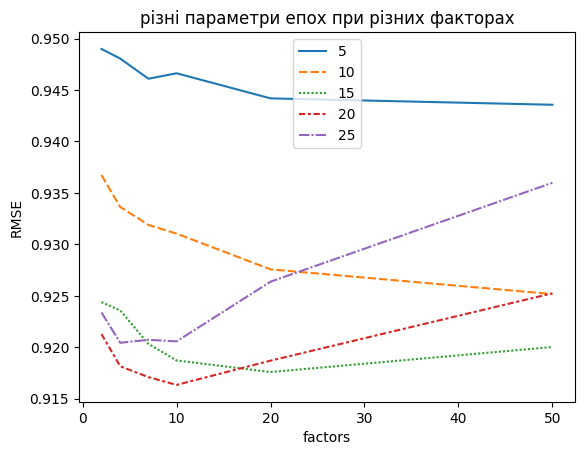

In [46]:
from surprise import SVDpp

trainset, testset = train_test_split(data, test_size=0.15, train_size=0.2)

#через тривалість навчання і підбору, зміеньшено розмірності
#зменьшив тренувальну виборку також

factors = [2, 4, 7, 10, 20, 50] #100
epochs = [5, 10, 15, 20, 25] #20
df_rmse_pp = pd.DataFrame()

for cur_fact in factors:
  for epoch in epochs:
    print(f'SVD++  cur_fact {cur_fact} epoch {epoch}')
    algo = SVDpp(n_factors=cur_fact, n_epochs=epoch)
    algo.fit(trainset)
    predictions = algo.test(testset)
    rez = cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=False)['test_rmse']
    df_rmse_pp.loc[cur_fact,epoch] = rez.mean()

sn.lineplot(data=df_rmse_pp).set(xlabel='factors', ylabel='RMSE', title='різні параметри епох при різних факторах')
df_rmse_pp

In [47]:
algo = SVDpp(n_factors=10, n_epochs=20)

algo.fit(trainset)
predictions = algo.test(testset)

mse = accuracy.mse(predictions)
rmse = accuracy.rmse(predictions)

MSE: 0.9391
RMSE: 0.9691


наступна модель

NMF  cur_fact 2 epoch 5
NMF  cur_fact 2 epoch 10
NMF  cur_fact 2 epoch 15
NMF  cur_fact 2 epoch 20
NMF  cur_fact 2 epoch 25
NMF  cur_fact 4 epoch 5
NMF  cur_fact 4 epoch 10
NMF  cur_fact 4 epoch 15
NMF  cur_fact 4 epoch 20
NMF  cur_fact 4 epoch 25
NMF  cur_fact 7 epoch 5
NMF  cur_fact 7 epoch 10
NMF  cur_fact 7 epoch 15
NMF  cur_fact 7 epoch 20
NMF  cur_fact 7 epoch 25
NMF  cur_fact 10 epoch 5
NMF  cur_fact 10 epoch 10
NMF  cur_fact 10 epoch 15
NMF  cur_fact 10 epoch 20
NMF  cur_fact 10 epoch 25
NMF  cur_fact 20 epoch 5
NMF  cur_fact 20 epoch 10
NMF  cur_fact 20 epoch 15
NMF  cur_fact 20 epoch 20
NMF  cur_fact 20 epoch 25
NMF  cur_fact 50 epoch 5
NMF  cur_fact 50 epoch 10
NMF  cur_fact 50 epoch 15
NMF  cur_fact 50 epoch 20
NMF  cur_fact 50 epoch 25


,5,10,15,20,25
2,1.836163,2.421982,1.796619,1.968890,1.682932
4,1.798603,2.014662,1.684207,1.643434,1.474347
7,1.578232,1.513637,1.365759,1.276871,1.175925
10,1.166189,1.144278,1.055318,1.057417,1.003236
20,1.418615,1.261193,1.207574,1.107012,1.089515
50,2.479521,1.799354,1.940659,1.643399,1.542256


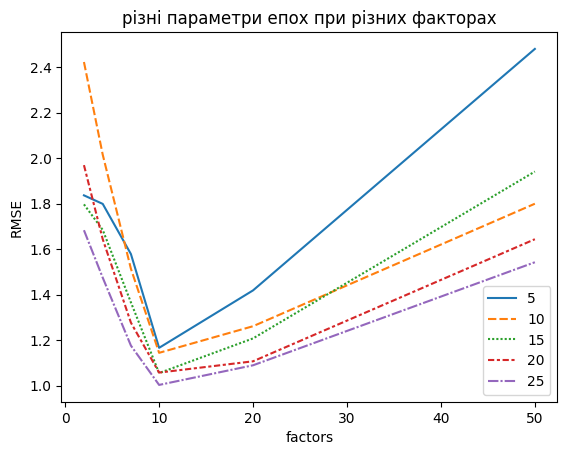

In [48]:
from surprise import NMF

trainset, testset = train_test_split(data, test_size=0.15, train_size=0.2)

#через тривалість навчання і підбору, зміеньшено розмірності
#зменьшив тренувальну виборку також

factors = [2, 4, 7, 10, 20, 50] #100
epochs = [5, 10, 15, 20, 25] #20
df_rmse_nmf = pd.DataFrame()

for cur_fact in factors:
  for epoch in epochs:
    print(f'NMF  cur_fact {cur_fact} epoch {epoch}')
    algo = NMF(n_factors=cur_fact, n_epochs=epoch)
    algo.fit(trainset)
    predictions = algo.test(testset)
    rez = cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=False)['test_rmse']
    df_rmse_nmf.loc[cur_fact,epoch] = rez.mean()

sn.lineplot(data=df_rmse_nmf).set(xlabel='factors', ylabel='RMSE', title='різні параметри епох при різних факторах')

df_rmse_nmf

спробую більш точно підібрати фактори в околі 10

та збільшу кількість факторів

без роздруку

NMF-2  cur_fact 7 epoch 5
NMF-2  cur_fact 7 epoch 15
NMF-2  cur_fact 7 epoch 30
NMF-2  cur_fact 7 epoch 50
NMF-2  cur_fact 7 epoch 75
NMF-2  cur_fact 9 epoch 5
NMF-2  cur_fact 9 epoch 15
NMF-2  cur_fact 9 epoch 30
NMF-2  cur_fact 9 epoch 50
NMF-2  cur_fact 9 epoch 75
NMF-2  cur_fact 10 epoch 5
NMF-2  cur_fact 10 epoch 15
NMF-2  cur_fact 10 epoch 30
NMF-2  cur_fact 10 epoch 50
NMF-2  cur_fact 10 epoch 75
NMF-2  cur_fact 11 epoch 5
NMF-2  cur_fact 11 epoch 15
NMF-2  cur_fact 11 epoch 30
NMF-2  cur_fact 11 epoch 50
NMF-2  cur_fact 11 epoch 75
NMF-2  cur_fact 13 epoch 5
NMF-2  cur_fact 13 epoch 15
NMF-2  cur_fact 13 epoch 30
NMF-2  cur_fact 13 epoch 50
NMF-2  cur_fact 13 epoch 75


,5,15,30,50,75
7,1.579041,1.356567,1.137182,1.015153,0.957026
9,1.302348,1.132956,1.040903,0.985549,0.960830
10,1.159485,1.060701,1.012967,0.979070,0.959655
11,1.059503,1.004928,0.991026,0.973543,0.960925
13,0.984779,0.973586,0.968749,0.966054,0.959481


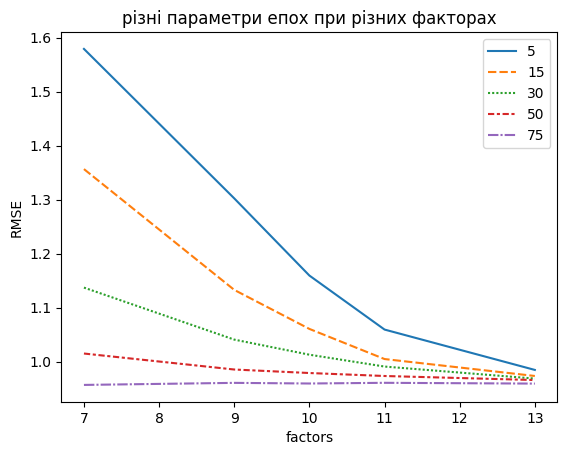

In [38]:
trainset, testset = train_test_split(data, test_size=0.25)

factors = [7, 9, 10, 11, 13]
epochs = [5, 15, 30, 50, 75]
df_rmse_nmf_2 = pd.DataFrame()

for cur_fact in factors:
  for epoch in epochs:
    print(f'NMF-2  cur_fact {cur_fact} epoch {epoch}')
    algo = NMF(n_factors=cur_fact, n_epochs=epoch)
    algo.fit(trainset)
    predictions = algo.test(testset)
    rez = cross_validate(algo, data, measures=['RMSE'], cv=5, verbose=False)['test_rmse']
    df_rmse_nmf_2.loc[cur_fact,epoch] = rez.mean()

sn.lineplot(data=df_rmse_nmf_2).set(xlabel='factors', ylabel='RMSE', title='різні параметри епох при різних факторах')

df_rmse_nmf_2


In [39]:
algo = NMF(n_factors=13, n_epochs=5)

algo.fit(trainset)
predictions = algo.test(testset)

mse = accuracy.mse(predictions)
rmse = accuracy.rmse(predictions)

MSE: 0.9862
RMSE: 0.9931


обрані результати

За сукумністю результатів (швідкість і метрика RMSE)
краще себе показує модель SVD на кількості факторів 50 при 20 ітераціях (епохах)

In [41]:
algo = SVD(n_factors=50, n_epochs=20)